# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Exploratory data analysis


In [ ]:
# Load the dataset
df = pd.read_excel("Assignment 2.2.xlsx", header=1)

In [ ]:
# Exploratory data analysis
df.head(5)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [ ]:
df.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

# Visualization of dependent variable to independent variables


<BarContainer object of 150 artists>

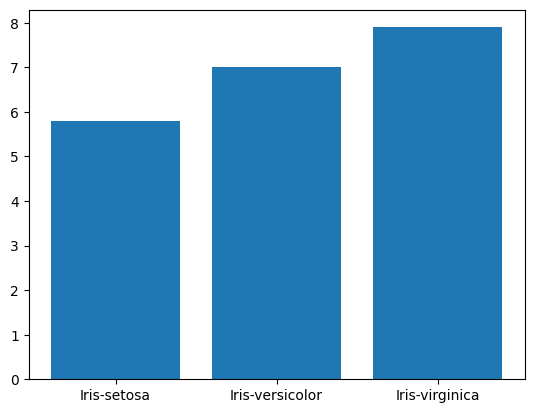

In [ ]:
# Visualization of dependent variable to independent variables
plt.bar(df['class'], df['sepallength'])

<BarContainer object of 150 artists>

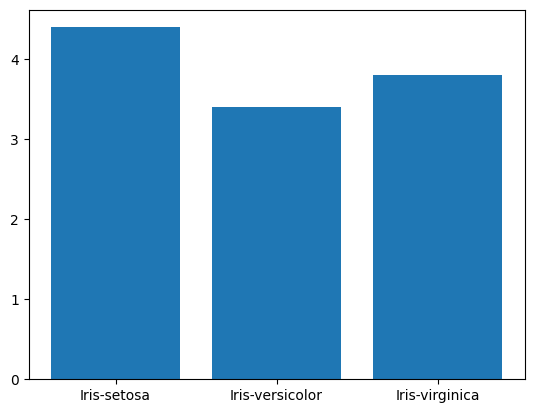

In [ ]:
plt.bar(df['class'], df['sepalwidth'])

<BarContainer object of 150 artists>

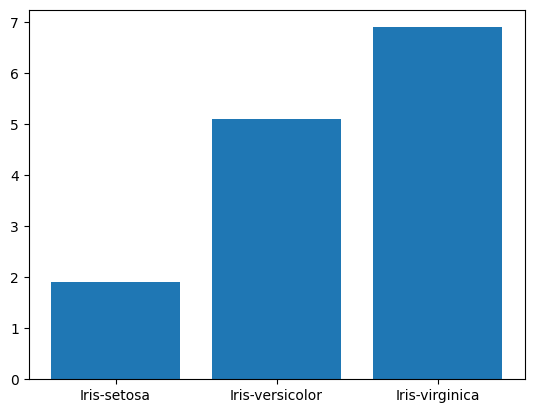

In [ ]:
plt.bar(df['class'], df['petallength'])

<BarContainer object of 150 artists>

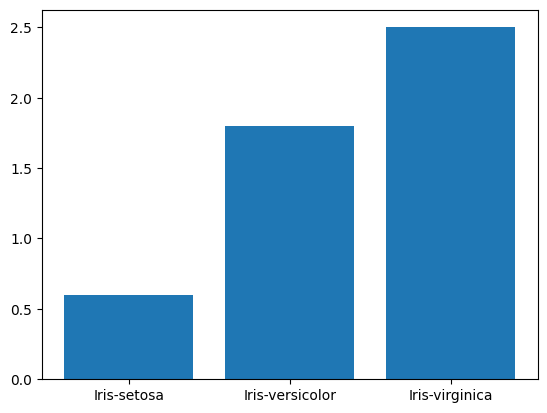

In [ ]:
plt.bar(df['class'], df['petalwidth'])

# kNN classifier model

In [ ]:
# Prepare the data
flowerClass = df['class']
flowerFeatures = df[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(flowerFeatures, flowerClass, test_size=0.2, random_state=42)

In [ ]:
# Create the kNN classifier with k=11
k = 11
knnIrisModel = KNeighborsClassifier(n_neighbors=k)

In [ ]:
# Train the classifier
knnIrisModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
# Predict the classes for the test set
flowerClassPrediction = knnIrisModel.predict(X_test)

In [ ]:
# Calculate the accuracy
accuracyResult = accuracy_score(y_test, flowerClassPrediction) * 100

In [ ]:
print(f"Using kNN classifier with k={k}:")
print(f"Accuracy on the test set: {accuracyResult:.2f}%")

Using kNN classifier with k=11:
Accuracy on the test set: 100.00%


In [ ]:
# Define the new samples
sampleA = [4.9, 2.8, 1.8, 1.5]
sampleB = [5.6, 3.4, 2.0, 1.5]
sampleArray = {}
headers = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

for index in range(len(headers)):
    sampleArray[headers[index]] = [sampleA[index], sampleB[index]]

sampleADf = pd.DataFrame.from_dict(sampleArray)

In [ ]:
# Predict the variety of the new samples
samplePrediction = knnIrisModel.predict(sampleADf)

In [ ]:
# Print the predictions for each sample
for i in range(len(samplePrediction)):
    print(f"For sample {i+1}:")
    for label in headers:
        print(f"{label}: {sampleArray[label][i]}")
    print(f"Prediction: {samplePrediction[i]}\n")

For sample 1:
sepallength: 4.9
sepalwidth: 2.8
petallength: 1.8
petalwidth: 1.5
Prediction: Iris-setosa

For sample 2:
sepallength: 5.6
sepalwidth: 3.4
petallength: 2.0
petalwidth: 1.5
Prediction: Iris-setosa

